In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

파일 로드

In [14]:
df2020=pd.read_csv("../data2/2020.csv")
df2021=pd.read_csv("../data2/2021.csv")
df2022=pd.read_csv("../data2/2022.csv")


In [16]:
df2020.set_index('Rank', inplace=True)
df2021.set_index('Rank', inplace=True)
print(df2020.head())
print(df2021.head())

     Country name  Happiness score  upperwhisker  lowerwhisker  \
Rank                                                             
1         Finland           7.8087      7.869766      7.747634   
2         Denmark           7.6456      7.711245      7.579955   
3     Switzerland           7.5599      7.628528      7.491272   
4         Iceland           7.5045      7.621347      7.387653   
5          Norway           7.4880      7.556281      7.419719   

      GDP per capita  Social support  Healthy life expectancy  \
Rank                                                            
1          10.639267        0.954330                71.900825   
2          10.774001        0.955991                72.402504   
3          10.979933        0.942847                74.102448   
4          10.772559        0.974670                73.000000   
5          11.087804        0.952487                73.200783   

      Freedom to make life choices  Generosity  Dystopia  
Rank                  

데이터 읽어보기

In [17]:
df2021

,Country name,Happiness score,upperwhisker,lowerwhisker,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Dystopia
Rank,,,,,,,,,,
1,Finland,7.842,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,3.253
2,Denmark,7.620,7.687,7.552,10.933,0.954,72.700,0.946,0.030,2.868
3,Switzerland,7.571,7.643,7.500,11.117,0.942,74.400,0.919,0.025,2.839
4,Iceland,7.554,7.670,7.438,10.878,0.983,73.000,0.955,0.160,2.967
5,Netherlands,7.464,7.518,7.410,10.932,0.942,72.400,0.913,0.175,2.798
...,...,...,...,...,...,...,...,...,...,...
145,Lesotho,3.512,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,1.800
146,Botswana,3.467,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.648
147,Rwanda,3.415,3.548,3.282,7.676,0.552,61.400,0.897,0.061,1.095


In [18]:
df2020.drop(['upperwhisker', 'Dystopia', 'lowerwhisker'], axis=1, inplace=True)
df2021.drop(['upperwhisker', 'Dystopia', 'lowerwhisker'], axis=1, inplace=True)
print(df2020.head())
print(df2021.head())


     Country name  Happiness score  GDP per capita  Social support  \
Rank                                                                 
1         Finland           7.8087       10.639267        0.954330   
2         Denmark           7.6456       10.774001        0.955991   
3     Switzerland           7.5599       10.979933        0.942847   
4         Iceland           7.5045       10.772559        0.974670   
5          Norway           7.4880       11.087804        0.952487   

      Healthy life expectancy  Freedom to make life choices  Generosity  
Rank                                                                     
1                   71.900825                      0.949172   -0.059482  
2                   72.402504                      0.951444    0.066202  
3                   74.102448                      0.921337    0.105911  
4                   73.000000                      0.948892    0.246944  
5                   73.200783                      0.955750    0.

위의 데이터를 가직 상관관계 분석을 해보자.

컬럼이름 바꾸기
하나하나 바꿀때는 rename을 하는데, 모두 바꾸려고 하면 리스트로 묶어서

In [20]:
columns_list=['Country', 'Score', 'GDP.pre.capita', 'Social.support', 'Life.expectancy', 'Freedom', 'Generosity']
df2020.columns=columns_list
df2021.columns=columns_list
print(df2020.head())
print(df2021.head())

          Country   Score  GDP.pre.capita  Social.support  Life.expectancy  \
Rank                                                                         
1         Finland  7.8087       10.639267        0.954330        71.900825   
2         Denmark  7.6456       10.774001        0.955991        72.402504   
3     Switzerland  7.5599       10.979933        0.942847        74.102448   
4         Iceland  7.5045       10.772559        0.974670        73.000000   
5          Norway  7.4880       11.087804        0.952487        73.200783   

       Freedom  Generosity  
Rank                        
1     0.949172   -0.059482  
2     0.951444    0.066202  
3     0.921337    0.105911  
4     0.948892    0.246944  
5     0.955750    0.134533  
          Country  Score  GDP.pre.capita  Social.support  Life.expectancy  \
Rank                                                                        
1         Finland  7.842          10.775           0.954             72.0   
2         Denmark  

필요한 것 만 추려보자. drop 시켜.

In [21]:
df1=df2020.copy()
df1.drop(['Social.support', 'Life.expectancy', 'Generosity'], axis=1, inplace=True)
df1

,Country,Score,GDP.pre.capita,Freedom
Rank,,,,
1,Finland,7.8087,10.639267,0.949172
2,Denmark,7.6456,10.774001,0.951444
3,Switzerland,7.5599,10.979933,0.921337
4,Iceland,7.5045,10.772559,0.948892
5,Norway,7.4880,11.087804,0.955750
...,...,...,...,...
149,Central African Republic,3.4759,6.625160,0.640881
150,Rwanda,3.3123,7.600104,0.900589
151,Zimbabwe,3.2992,7.865712,0.711458


In [23]:
corr=df1.corr(numeric_only=True)
corr

,Score,GDP.pre.capita,Freedom
Score,1.000000,0.775374,0.590597
GDP.pre.capita,0.775374,1.000000,0.419019
Freedom,0.590597,0.419019,1.000000


0.8기준으로 읽으면, GDP는 제법 상관이 높아. 히트맵을 그려보자.
상관관계가 높은 곳은 짙은 색이 나타나.

<Axes: >

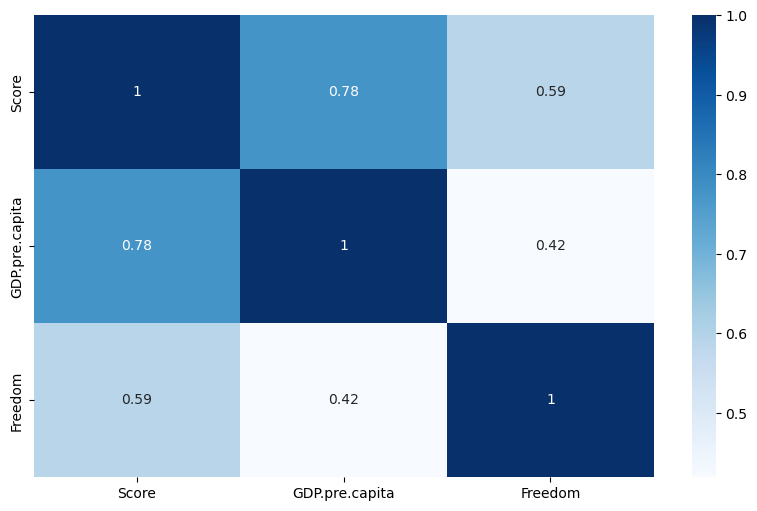

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='Blues')

df2

In [25]:
df2=df2021.copy()
df2.drop(['Social.support', 'Life.expectancy', 'Generosity'], axis=1, inplace=True)
df2

,Country,Score,GDP.pre.capita,Freedom
Rank,,,,
1,Finland,7.842,10.775,0.949
2,Denmark,7.620,10.933,0.946
3,Switzerland,7.571,11.117,0.919
4,Iceland,7.554,10.878,0.955
5,Netherlands,7.464,10.932,0.913
...,...,...,...,...
145,Lesotho,3.512,7.926,0.715
146,Botswana,3.467,9.782,0.824
147,Rwanda,3.415,7.676,0.897


In [26]:
corr=df2.corr(numeric_only=True)
corr

,Score,GDP.pre.capita,Freedom
Score,1.000000,0.789760,0.607753
GDP.pre.capita,0.789760,1.000000,0.432323
Freedom,0.607753,0.432323,1.000000


<Axes: >

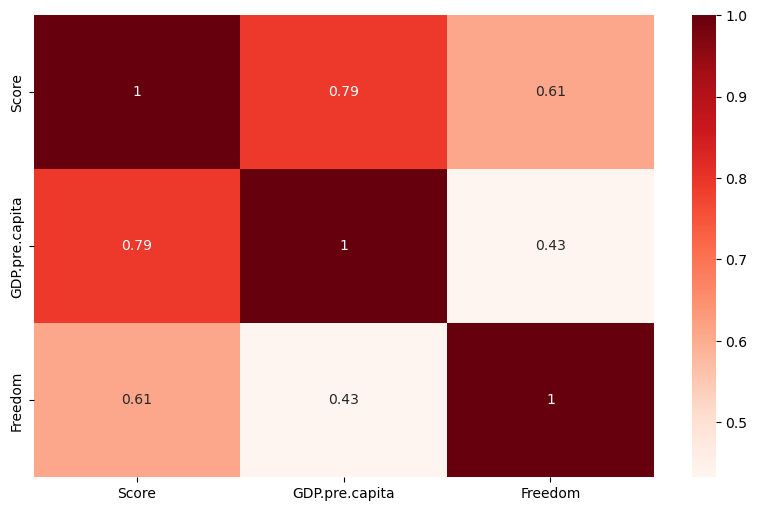

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='Reds')

행복지수와 국가의 사회적 상태와의 상관관계

In [31]:
x1=df2020[['Generosity', 'Social.support', 'Score']].copy()
x2=df2021[['Generosity', 'Social.support', 'Score']].copy()
x1
x2

,Generosity,Social.support,Score
Rank,,,
1,-0.098,0.954,7.842
2,0.030,0.954,7.620
3,0.025,0.942,7.571
4,0.160,0.983,7.554
5,0.175,0.942,7.464
...,...,...,...
145,-0.131,0.787,3.512
146,-0.246,0.784,3.467
147,0.061,0.552,3.415


<Axes: >

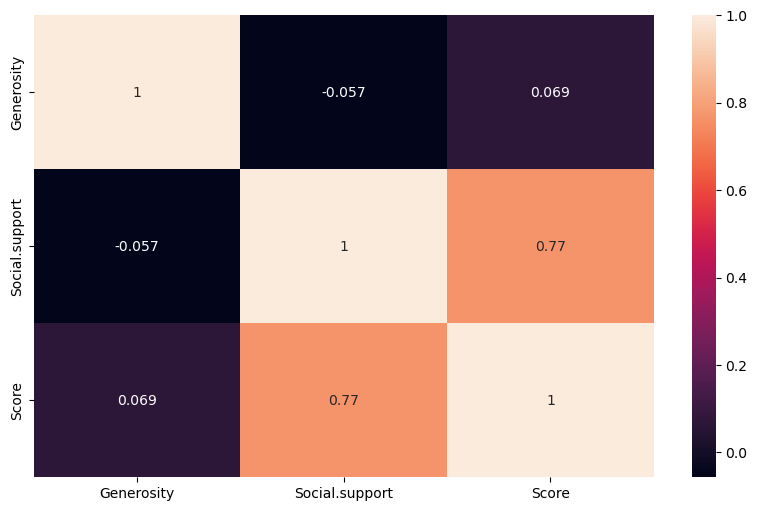

In [43]:
a1=x1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(a1, annot=True)

전체 변수간의 상관관계

In [34]:
corr2020=df2020.corr(numeric_only=True)
corr2020

,Score,GDP.pre.capita,Social.support,Life.expectancy,Freedom,Generosity
Score,1.000000,0.775374,0.765001,0.770316,0.590597,0.069043
GDP.pre.capita,0.775374,1.000000,0.781814,0.848469,0.419019,-0.118399
Social.support,0.765001,0.781814,1.000000,0.742744,0.478863,-0.056780
Life.expectancy,0.770316,0.848469,0.742744,1.000000,0.448846,-0.071852
Freedom,0.590597,0.419019,0.478863,0.448846,1.000000,0.253721
Generosity,0.069043,-0.118399,-0.056780,-0.071852,0.253721,1.000000


[[ 1.          0.7753744   0.76500076  0.77031629  0.59059678  0.06904313]
 [ 0.          1.          0.78181358  0.84846862  0.41901865 -0.11839937]
 [ 0.          0.          1.          0.74274409  0.47886318 -0.05678035]
 [ 0.          0.          0.          1.          0.44884619 -0.07185211]
 [ 0.          0.          0.          0.          1.          0.25372112]
 [ 0.          0.          0.          0.          0.          1.        ]]


<Axes: >

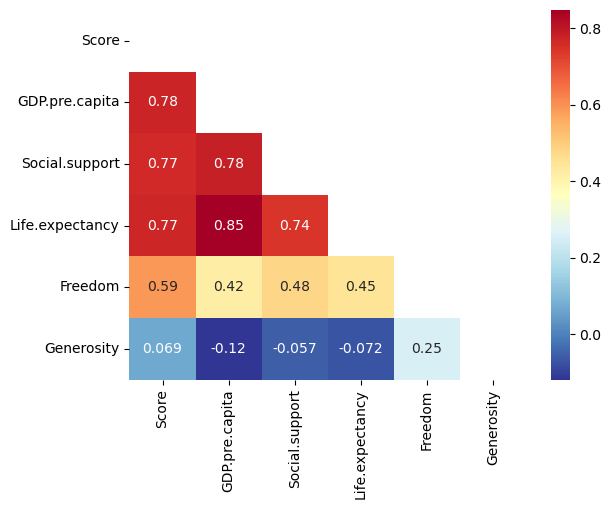

In [41]:
mask=np.triu(corr2020) #위쪽을 마스크 씌워
print(mask)
sns.heatmap(corr2020, annot=True, cmap='RdYlBu_r', mask=mask)